### This is a **Flower Predictions** Model
### by using the **user** input


### Importing The Essential Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Loading The DataSet

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df["species"] = iris.target
print(df.head())

### Renaming The Columns For Minimizing Naming Conflict

In [ ]:
df = df.rename(columns={
    'sepal length (cm)' : 'sepal_length',
    'sepal width (cm)'  : 'sepal_width',
    'petal length (cm)' : 'petal_length',
    'petal width (cm)' :  'petal_width',
    'target' : 'species' 
})

print(df.isnull().sum())
x = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

### Train-Test split (80% train, 20% test)

In [ ]:
x_train,x_test,y_train,y_test =  train_test_split(x,y, test_size=0.2,random_state=42)

print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)

### Training The Model 

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

### Make Predictions

In [ ]:
y_Pred = model.predict(x_test)

### confusion Matrix

In [ ]:
accuracy = accuracy_score(y_test, y_Pred)
print(f"\n✅ Accuracy Score: {accuracy:.2f}")
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_Pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_Pred, target_names=iris.target_names))

### Function for Predictions

In [ ]:
def make_predictions():
    

    
        try:
            sepal_length = float(input("Enter The Lenght of sepal:-"))
            sepal_width = float(input("Enter The width of sepal:-"))
            petal_length = float(input("Enter The Lenght of petal:-"))
            petal_width = float(input("Enter The width of petal:-"))
            

            DataO =pd.DataFrame([[sepal_length, sepal_width,petal_length,petal_width]],columns=['sepal_length','sepal_width','petal_length','petal_width'])
            Predictions = model.predict(DataO)[0]

            Prediction = int(round(Predictions))

            flower = iris.target_names[Prediction]
            print(f"This is likely to be an Iris {flower}")



         
        except Exception as e :
            print("⚠️ Unexpected Error:", e)

### Running the Whole Function

In [23]:
make_predictions()

⚠️ Unexpected Error: could not convert string to float: ''


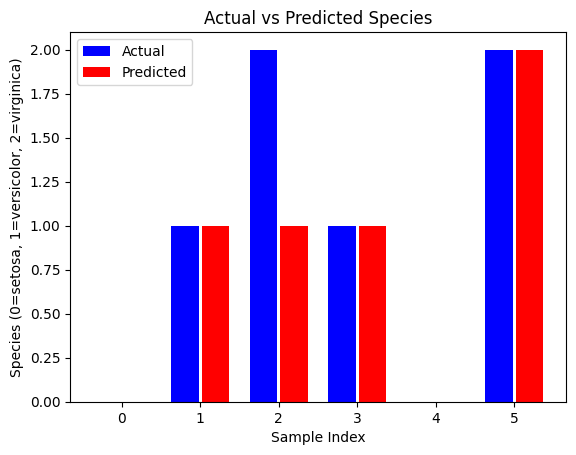

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# x-axis positions
x = np.arange(len(y_test))

# Bar width
width = 0.35

# Plot bars: actual vs predicted
plt.bar(x - width/1.8, y_test, width, color='blue', label='Actual')
plt.bar(x + width/1.8, y_Pred, width, color='red', label='Predicted')

# Labels, title, and legend
plt.xlabel('Sample Index')
plt.ylabel('Species (0=setosa, 1=versicolor, 2=virginica)')
plt.title('Actual vs Predicted Species')
plt.legend()

# Save figure
plt.savefig('Actual_vs_Predicted_Bar.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()
